In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# 讀取資料
df = pd.read_csv('L11_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,11,2024-02-28 06:04:46.000,0.0,1017.09,16.03,87.67,21.67,0.00
1,11,2024-02-28 06:05:46.000,0.0,1017.07,16.00,87.51,25.83,0.01
2,11,2024-02-28 06:06:46.000,0.0,1017.05,15.98,87.89,31.67,0.01
3,11,2024-02-28 06:07:46.000,0.0,1017.06,15.97,88.06,39.17,0.00
4,11,2024-02-28 06:08:46.000,0.0,1017.06,15.94,87.97,47.50,0.01
...,...,...,...,...,...,...,...,...
56963,11,2024-07-15 17:42:07.000,0.0,1006.85,32.26,97.14,831.67,0.29
56964,11,2024-07-15 17:43:07.000,0.0,1006.83,32.28,97.51,835.83,0.24
56965,11,2024-07-15 17:44:07.000,0.0,1006.85,32.30,96.25,832.50,0.23
56966,11,2024-07-15 17:45:07.000,0.0,1006.88,32.29,95.22,812.50,0.23


In [5]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,56968.0,56968.000000,56968.000000,56968.000000,56968.000000,56968.000000,56968.000000
mean,11.0,0.241567,1010.682486,26.118606,80.478807,6307.585300,69.699401
std,0.0,0.592392,4.799626,5.854421,18.621930,13189.954753,280.866987
min,11.0,0.000000,1000.570000,13.070000,18.940000,20.000000,0.000000
25%,11.0,0.000000,1006.810000,21.670000,67.770000,987.500000,0.380000
50%,11.0,0.000000,1010.010000,26.380000,84.620000,2574.170000,2.880000
75%,11.0,0.000000,1014.290000,30.030000,100.000000,5364.170000,12.010000
max,11.0,8.270000,1023.990000,46.300000,100.000000,113582.260000,2074.180000


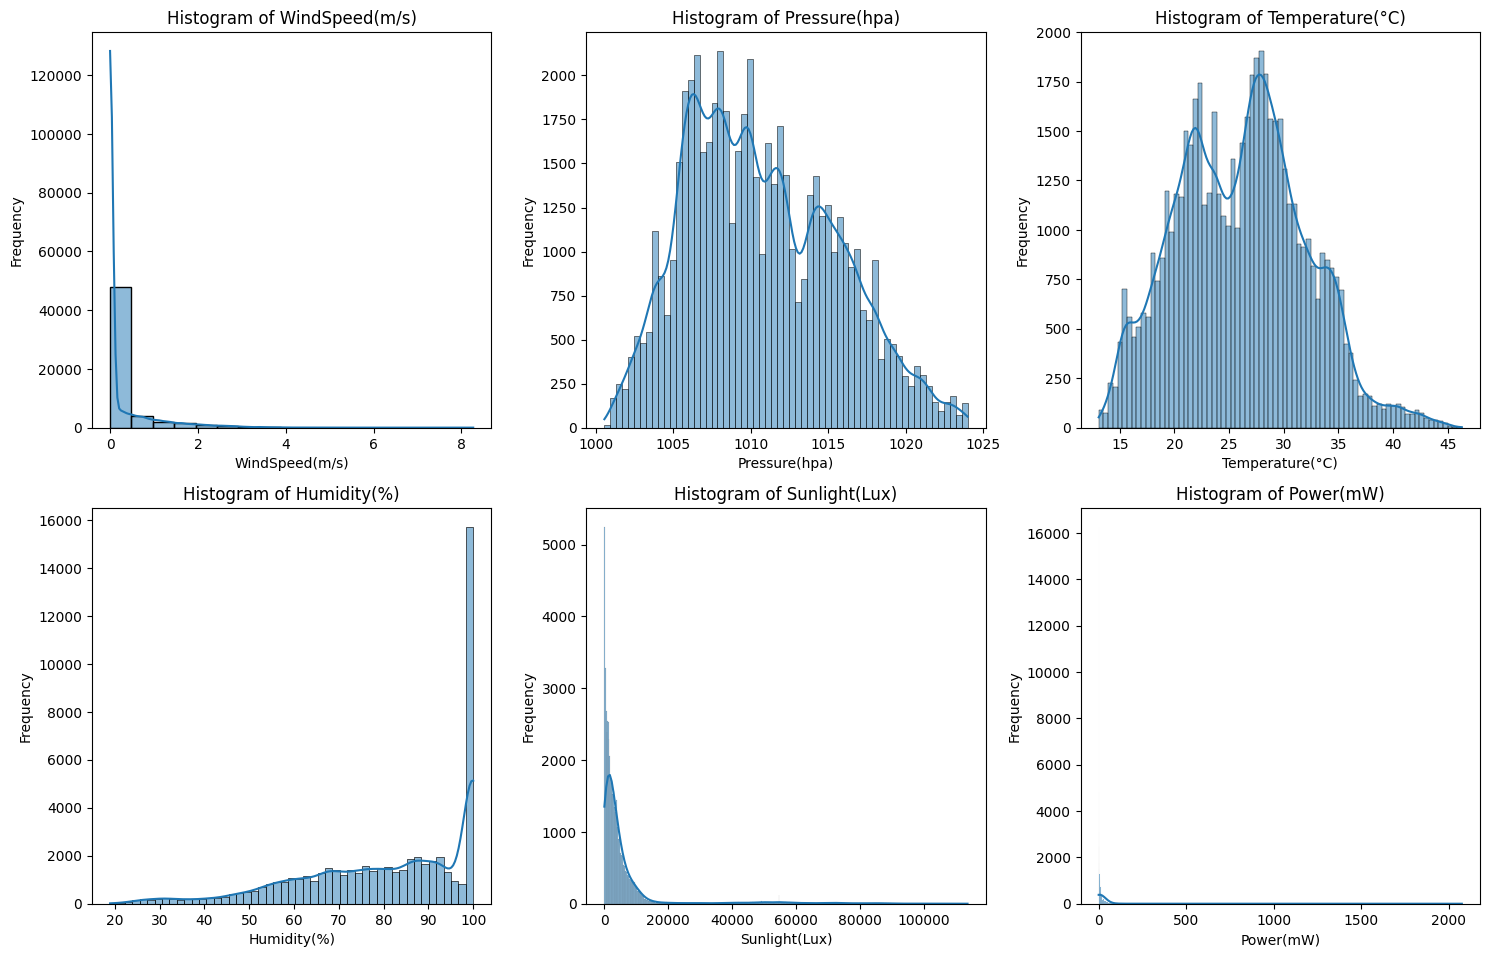

In [6]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
46912,11,2024-06-10 11:50:06.000,0.0,1003.73,37.36,73.84,113582.26,1159.37


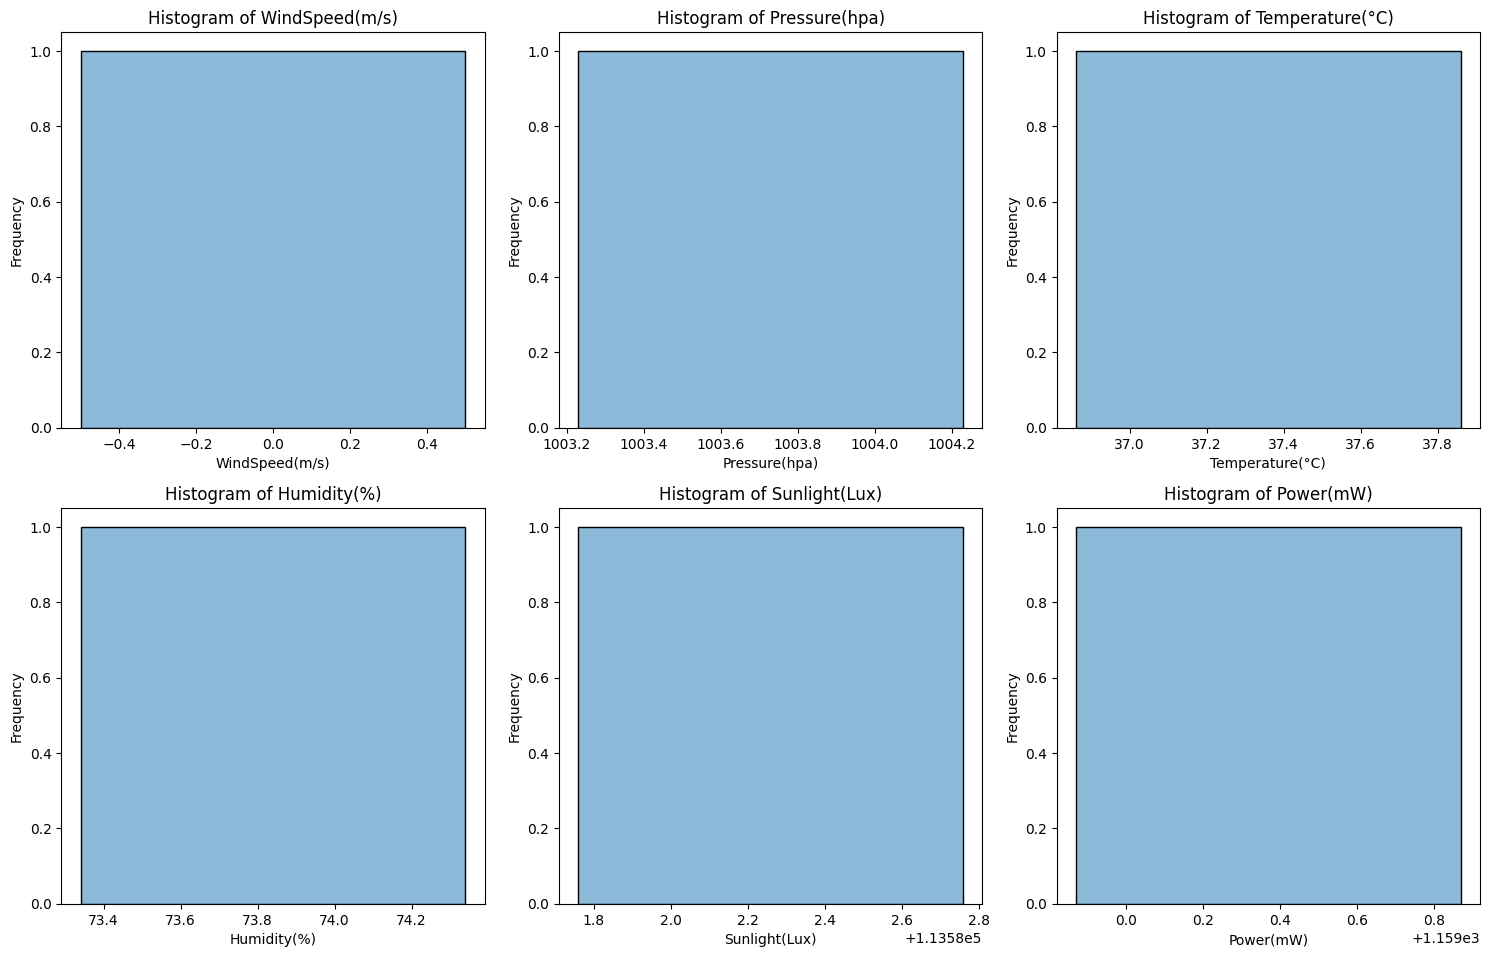

In [8]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [9]:
#　Sunlight(Lux)　最大值為113582.26，沒超過117758.2 lux，因此不做數值修正

In [10]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [11]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240228060411,0.0,1017.08,15.94,88.08,45.67,0.01
1,20240228061411,0.0,1017.11,15.82,87.56,112.25,0.02
2,20240228062411,0.0,1017.20,15.77,86.93,470.08,0.23
3,20240228063411,0.0,1017.29,15.89,86.93,969.50,0.72
4,20240228064411,0.0,1017.39,16.18,86.75,1763.50,1.99
...,...,...,...,...,...,...,...
5692,20240715165911,0.0,1006.47,32.79,91.28,1731.75,1.42
5693,20240715170911,0.0,1006.55,32.57,93.52,1249.83,0.66
5694,20240715171911,0.0,1006.61,32.39,95.78,1073.83,0.40
5695,20240715172911,0.0,1006.71,32.27,98.01,915.83,0.29


# HEATMAP

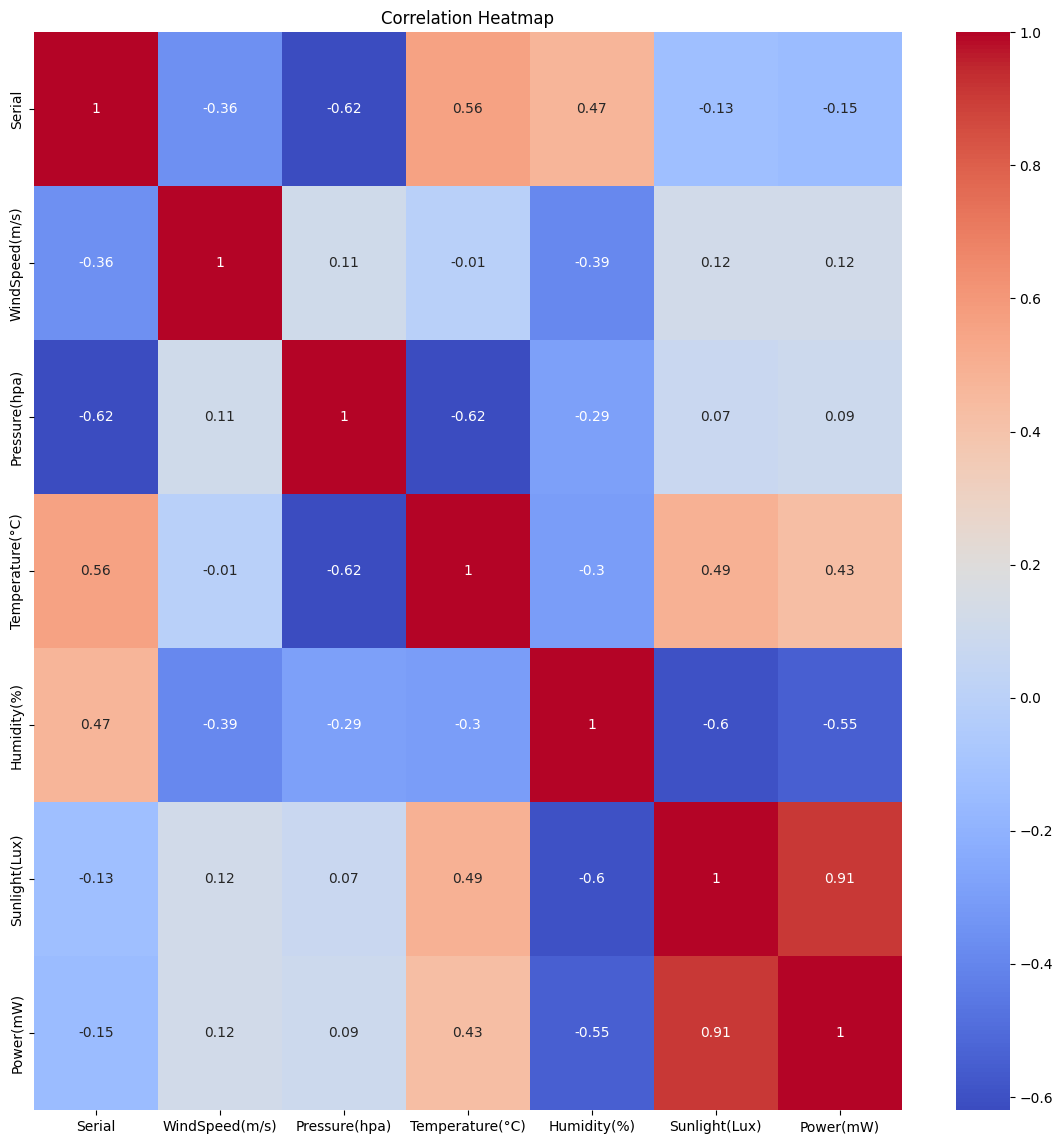

In [12]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.913764
Humidity(%)        0.551927
Temperature(°C)    0.432875
Serial             0.153461
WindSpeed(m/s)     0.118072
Pressure(hpa)      0.093777
Name: Power(mW), dtype: float64

In [14]:
df.to_csv('L11_Train_Revise.csv', index=False)